### Generic Descent

    
    Parameters:
    - f: function to minimize.
    - grad_f: gradient of the function.
    - x0: initial guess (numpy array).
    - alpha_func: function to determine the step size.
    - tol: tolerance for convergence (default: 1e-6).
    - max_iter: maximum number of iterations (default: 1000).
    
    Returns:
    - x: optimized value of x.
    - f(x): function value at the optimized x.

Optimized x: [3.138550867693342e-06, 3.138550867693342e-06]
Function value at optimized x: 1.9701003098197258e-11


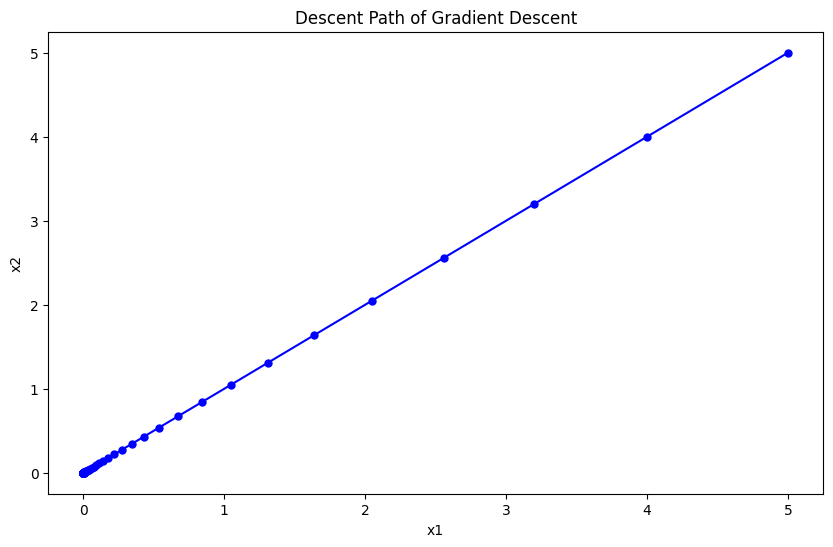

In [2]:
import matplotlib.pyplot as plt

def dot_product(v1, v2):
    result = 0
    for i in range(len(v1)):
        result += v1[i] * v2[i]
    return result

def vector_add(v1, v2):
    result = []
    for i in range(len(v1)):
        result.append(v1[i] + v2[i])
    return result

def vector_subtract(v1, v2):
    result = []
    for i in range(len(v1)):
        result.append(v1[i] - v2[i])
    return result

def scalar_multiply(scalar, vector):
    result = []
    for i in range(len(vector)):
        result.append(scalar * vector[i])
    return result

def vector_norm(v):
    total = 0
    for i in range(len(v)):
        total += v[i] ** 2
    return total ** 0.5

def generic_descent(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = x0
    k = 0
    history = [x0]
    while k < max_iter:
        gradient = grad_f(x)
        d = scalar_multiply(-1, gradient)
        
        if dot_product(gradient, d) >= 0:
            d = scalar_multiply(-1, gradient)

        alpha = 0.1
        scaled_d = scalar_multiply(alpha, d)
        x_new = vector_add(x, scaled_d)

        if vector_norm(vector_subtract(x_new, x)) < tol:
            break

        x = x_new
        history.append(x)
        k += 1

    return x, f(x), history

def func(x):
    return x[0]**2 + x[1]**2

def grad_func(x):
    return [2 * x[0], 2 * x[1]]

x0 = [5, 5]
optimal_x, optimal_value, history = generic_descent(func, grad_func, x0)

print("Optimized x:", optimal_x)
print("Function value at optimized x:", optimal_value)


x_vals = [point[0] for point in history]
y_vals = [point[1] for point in history]
z_vals = [func(point) for point in history]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'bo-', markersize=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Descent Path of Gradient Descent")
plt.show()


This indicates that the function's minimum is located near the origin (0,0).

### Gradient Descent


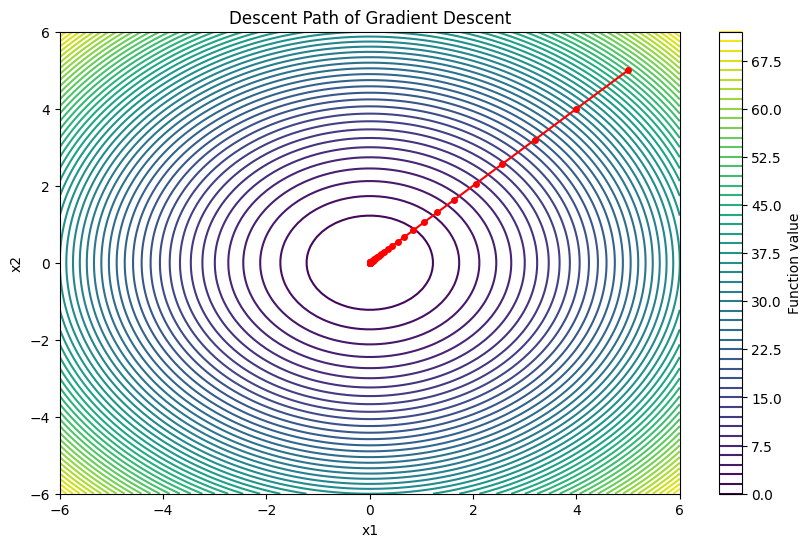

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(f, grad_f, x0, alpha=0.1, tol=1e-6, max_iter=1000):
    x = x0
    k = 0
    history = [x0.copy()]
    while vector_norm(grad_f(x)) > tol and k < max_iter:
        grad = grad_f(x)
        x[0] -= alpha * grad[0]
        x[1] -= alpha * grad[1]
        history.append(x.copy())
        k += 1
    return x, f(x), history

def func(x):
    return x[0]**2 + x[1]**2

def grad_func(x):
    return [2 * x[0], 2 * x[1]]

def vector_norm(v):
    return sum(x**2 for x in v) ** 0.5


x0 = [5, 5]
alpha = 0.1
tolerance = 1e-6
optimal_x, optimal_value, history = gradient_descent(func, grad_func, x0, alpha, tolerance)

# Plotting the descent path
x_vals = [point[0] for point in history]
y_vals = [point[1] for point in history]


x_range = np.linspace(-6, 6, 100)
y_range = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + Y**2

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_vals, y_vals, 'ro-', markersize=4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Descent Path of Gradient Descent")
plt.colorbar(label="Function value")
plt.show()


### Golden Line Search


Optimal x: 2.000003354044424
Function value at optimal x: 1.1249613998000918e-11


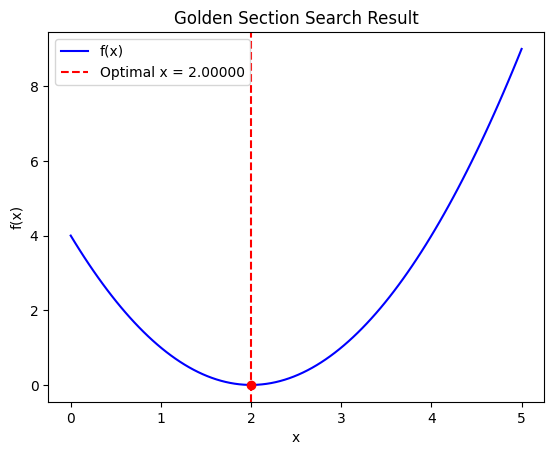

In [5]:
def golden_section_search(f, a, b, tol=1e-5, max_iter=1000):
    c = 0.618
    x1 = b - c * (b - a)
    x2 = a + c * (b - a)
    f_x1 = f(x1)
    f_x2 = f(x2)
    k = 1

    while abs(b - a) > tol and k < max_iter:
        if f_x1 < f_x2:
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = b - c * (b - a)
            f_x1 = f(x1)
        else:
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = a + c * (b - a)
            f_x2 = f(x2)
        k += 1

    x_star = (a + b) / 2
    f_star = f(x_star)
    return x_star, f_star

def func(x):
    result = (x - 2)**2
    return result

a = 0
b = 5
tolerance = 1e-5

optimal_x, optimal_value = golden_section_search(func, a, b, tolerance)

print("Optimal x:", optimal_x)
print("Function value at optimal x:", optimal_value)


import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(a, b, 100)
y_range = [func(x) for x in x_range]
plt.plot(x_range, y_range, 'b-', label="f(x)")
plt.axvline(optimal_x, color='r', linestyle='--', label=f"Optimal x = {optimal_x:.5f}")
plt.scatter(optimal_x, optimal_value, color='r', zorder=5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Golden Section Search Result")
plt.legend()
plt.show()


### Exact Line Search

Optimal x: (2.384185791015625e-06, 2.384185791015625e-06)
Function value at optimal x: 1.1368683772161603e-11
Iterations: 21


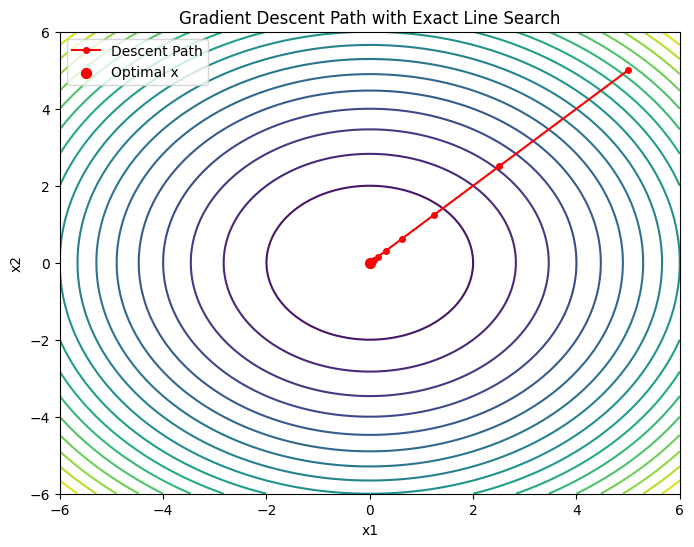

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent_exact_line_search(x1_0, x2_0, epsilon=1e-5, max_iter=1000):
    x1 = x1_0
    x2 = x2_0
    k = 0
    path_x1 = [x1]
    path_x2 = [x2]
    
    while k < max_iter:
        grad_f_x1 = 2 * x1
        grad_f_x2 = 2 * x2
        gradient_norm = (grad_f_x1 ** 2 + grad_f_x2 ** 2) ** 0.5
        
        if gradient_norm < epsilon:
            break
        
        alpha = (x1**2 + x2**2) / (grad_f_x1**2 + grad_f_x2**2)
        x1_next = x1 - alpha * grad_f_x1
        x2_next = x2 - alpha * grad_f_x2

        x1 = x1_next
        x2 = x2_next
        path_x1.append(x1)
        path_x2.append(x2)
        
        k += 1
    
    x_star = (x1, x2)
    f_star = x1 ** 2 + x2 ** 2
    return x_star, f_star, k, path_x1, path_x2

initial_x1 = 5
initial_x2 = 5
optimal_x, optimal_value, iterations, path_x1, path_x2 = gradient_descent_exact_line_search(initial_x1, initial_x2)

print("Optimal x:", optimal_x)
print("Function value at optimal x:", optimal_value)
print("Iterations:", iterations)

x_range = np.linspace(-6, 6, 100)
y_range = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + Y**2

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.plot(path_x1, path_x2, 'ro-', markersize=4, label="Descent Path")
plt.scatter(optimal_x[0], optimal_x[1], color='red', s=50, zorder=5, label="Optimal x")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gradient Descent Path with Exact Line Search")
plt.legend()
plt.show()


Optimal x: [1.8661831582443272e-07, 1.8661831582443272e-07]
Function value at optimal x: 6.965279160229543e-14
Iterations: 10


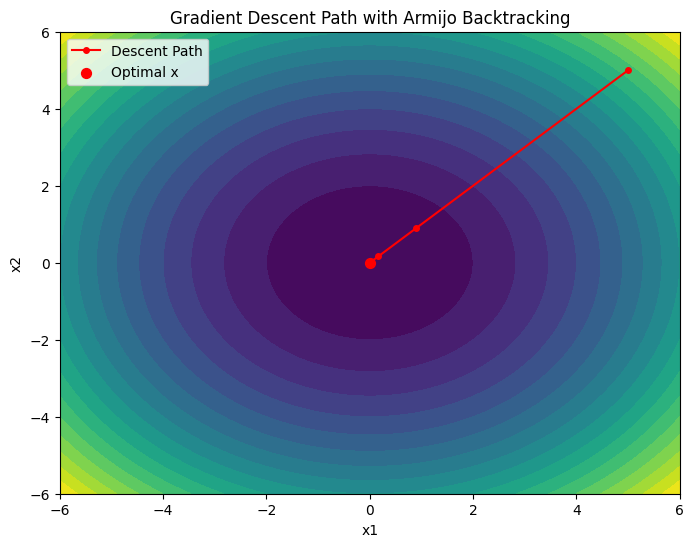

In [7]:
import matplotlib.pyplot as plt

def armijo_backtracking(f, grad_f, x0, c1=0.5, beta=0.8, epsilon=1e-6, max_iter=1000):
    x = x0[:]
    k = 0
    path_x1 = [x[0]]
    path_x2 = [x[1]]
    
    def dot_product(v1, v2):
        return sum(a * b for a, b in zip(v1, v2))
    
    def vector_norm(v):
        return sum(x**2 for x in v) ** 0.5

    while vector_norm(grad_f(x)) > epsilon and k < max_iter:
        grad = grad_f(x)
        alpha = 1.0
        
        while f([x[i] - alpha * grad[i] for i in range(len(x))]) > f(x) - c1 * alpha * dot_product(grad, grad):
            alpha *= beta
        
        x = [x[i] - alpha * grad[i] for i in range(len(x))]
        path_x1.append(x[0])
        path_x2.append(x[1])
        k += 1

    return x, f(x), k, path_x1, path_x2

def func(x):
    return x[0]**2 + x[1]**2

def grad_func(x):
    return [2 * x[0], 2 * x[1]]

x0 = [5, 5]
optimal_x, optimal_value, iterations, path_x1, path_x2 = armijo_backtracking(func, grad_func, x0)

print("Optimal x:", optimal_x)
print("Function value at optimal x:", optimal_value)
print("Iterations:", iterations)

# Visualization setup
x_range = [i / 10.0 for i in range(-60, 61)]
y_range = [i / 10.0 for i in range(-60, 61)]
X, Y = [], []
for x in x_range:
    row = []
    for y in y_range:
        row.append(func([x, y]))
    X.append(row)

plt.figure(figsize=(8, 6))
plt.contourf(x_range, y_range, X, levels=20, cmap="viridis")
plt.plot(path_x1, path_x2, 'ro-', markersize=4, label="Descent Path")
plt.scatter(optimal_x[0], optimal_x[1], color='red', s=50, zorder=5, label="Optimal x")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gradient Descent Path with Armijo Backtracking")
plt.legend()
plt.show()


### 